<a href="https://colab.research.google.com/github/wonseokb/Genat4_Study/blob/main/PSD_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Idea list
1. take data from google drive, so it can use a lot of data files easily
2. regulate the horizontal line, so it can the full right area  
3. take FWHM and rising time, fall time. 10% point, 20% point ect. for other features.

In [3]:
!pip install tqdm
from tqdm import tqdm
import time

import numpy as np
import os
from google.colab import drive
import matplotlib.pyplot as plt

# Mount the Google Drive to access files
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Read the organized data(You can starts from here)

In [ ]:
for i in tqdm(range(10)):
    
  # Load the array from the .npy file
  C3Sr90_x = np.load('/content/drive/My Drive/autoPSD.Sr90/C3Sr90_x.npy')
  C3Sr90_y = np.load('/content/drive/My Drive/autoPSD.Sr90/C3Sr90_y.npy')

time.sleep(1)

# Print the shape of the array to verify it is 2D
print(C3Sr90_x.shape)
print(C3Sr90_y.shape)


100%|██████████| 10/10 [01:45<00:00, 10.52s/it]


(21801, 2122)
(21801, 2122)


In [4]:
for i in tqdm(range(10)):
    
  # Load the array from the .npy file
  C3Sr90_x = np.load('/content/drive/My Drive/autoPSD.Sr90/C3Sr90_x.npy')
  C3Sr90_y = np.load('/content/drive/My Drive/autoPSD.Sr90/C3Sr90_y.npy')

  # Multiply each element of C3Sr90_y with 10^9
  C3Sr90_x *= 1e9
  C3Sr90_y *= 1e3

  time.sleep(1)

# Print the shape of the array to verify it is 2D
print(C3Sr90_x.shape)
print(C3Sr90_y.shape)

100%|██████████| 10/10 [00:23<00:00,  2.30s/it]

(21801, 2122)
(21801, 2122)


In [5]:
print(C3Sr90_x.shape)
print(C3Sr90_y.shape)

(21801, 2122)
(21801, 2122)


In [ ]:
for i in tqdm(range(10), desc="Progress"):
    # Load the array from the .npy file
    C3Cs137_x = np.load('/content/drive/My Drive/autoPSD.Cs137/C3Cs137_x.npy')
    C3Cs137_y = np.load('/content/drive/My Drive/autoPSD.Cs137/C3Cs137_y.npy')

time.sleep(1)
# Print the shape of the array to verify it is 2D
print(C3Cs137_x.shape)
print(C3Cs137_y.shape)


Progress: 100%|██████████| 10/10 [00:15<00:00,  1.59s/it]


(21801, 2122)
(21801, 2122)


In [ ]:
for i in tqdm(range(10), desc="Progress"):
    # Load the array from the .npy file
    C3Bi207_x = np.load('/content/drive/My Drive/autoPSD.Bi207/C3Bi207_x.npy')
    C3Bi207_y = np.load('/content/drive/My Drive/autoPSD.Bi207/C3Bi207_y.npy')

time.sleep(1)
# Print the shape of the array to verify it is 2D
print(C3Bi207_x.shape)
print(C3Bi207_y.shape)

Progress: 100%|██████████| 10/10 [00:15<00:00,  1.56s/it]


(21801, 2122)
(21801, 2122)


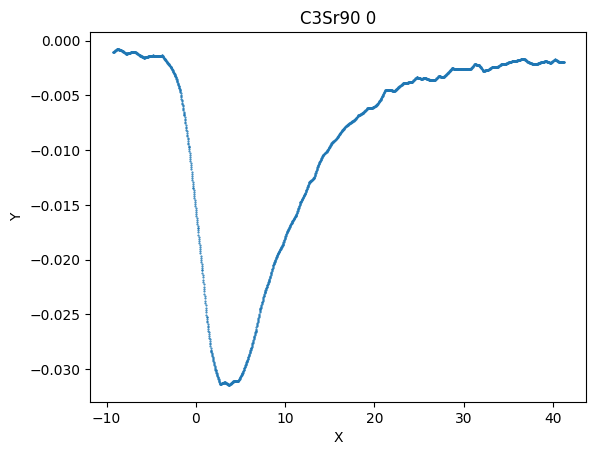

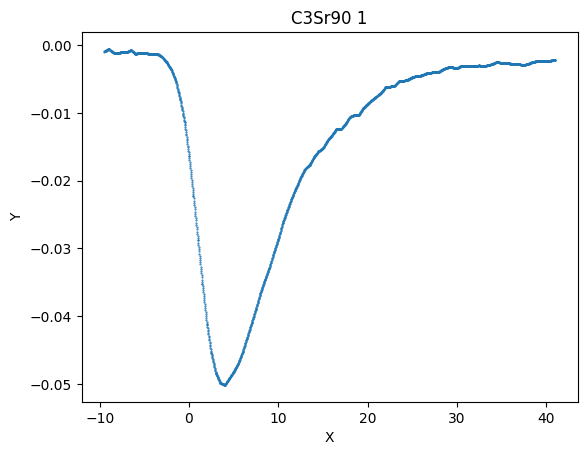

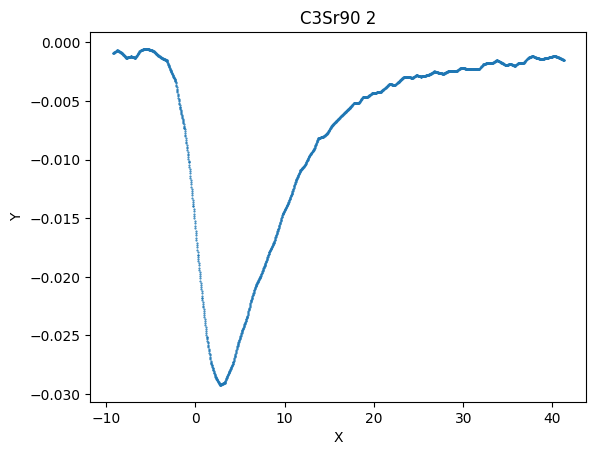

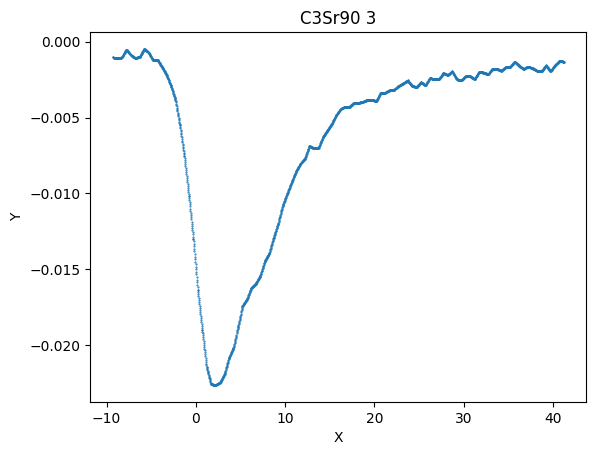

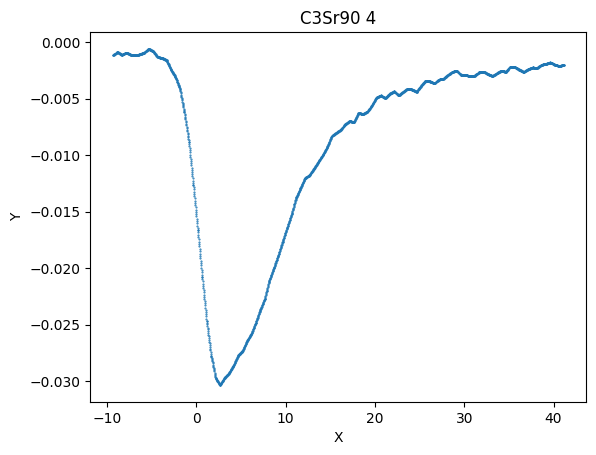

In [ ]:
# Loop through each file and plot the data

num_files = 5
start_num = 0

for i in range(num_files):
    plt.plot(C3Sr90_x[i], C3Sr90_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Sr90 ' + str(i + start_num))
    plt.show()

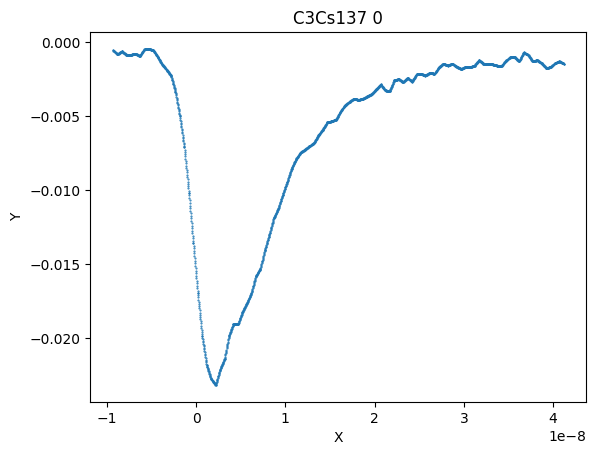

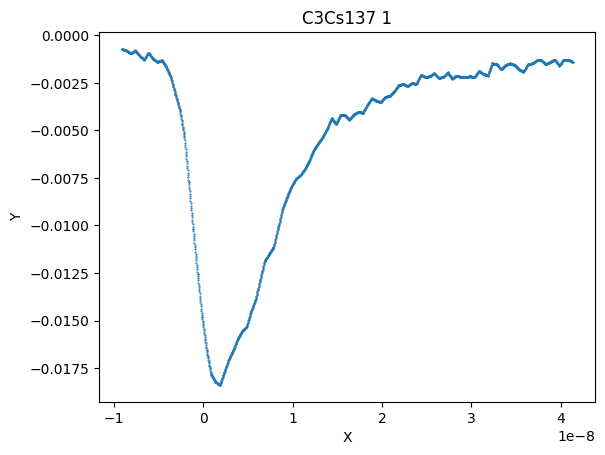

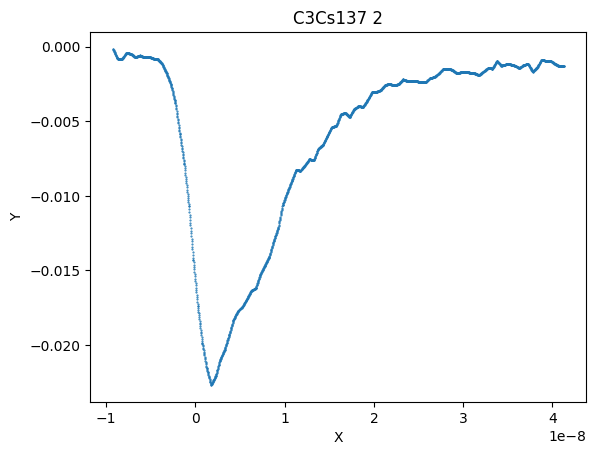

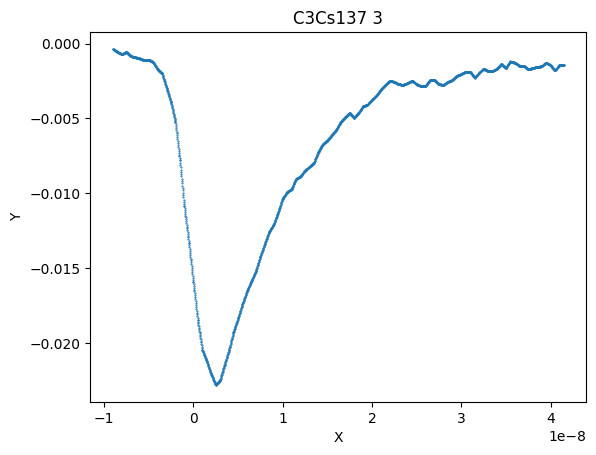

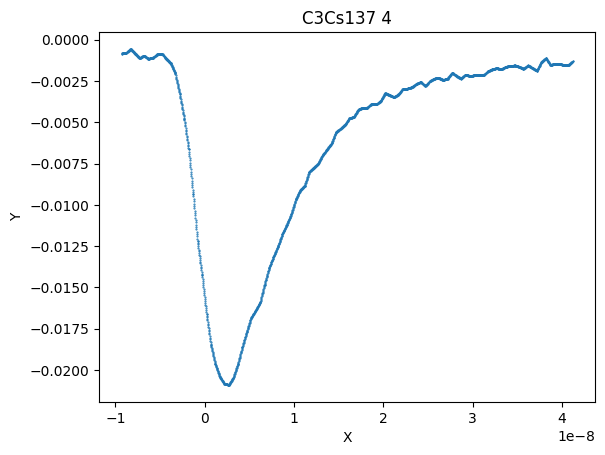

In [ ]:
# Loop through each file and plot the data

num_files = 5
start_num = 0

for i in range(num_files):
    plt.plot(C3Cs137_x[i], C3Cs137_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Cs137 ' + str(i + start_num))
    plt.show()

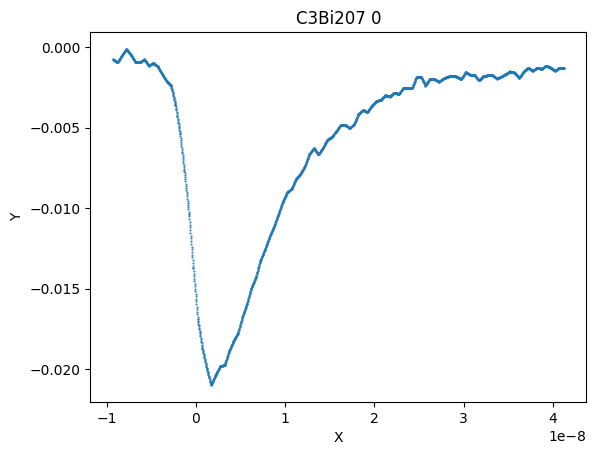

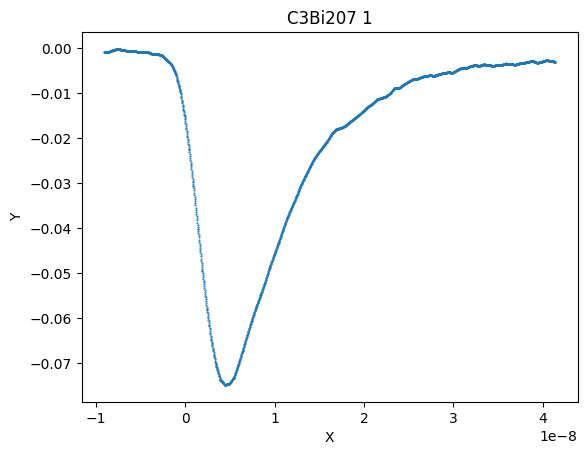

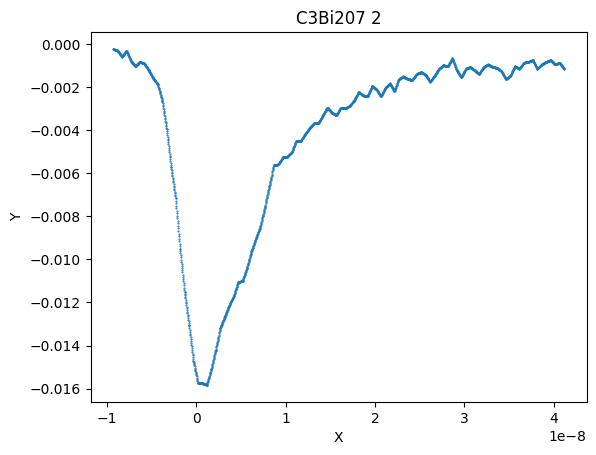

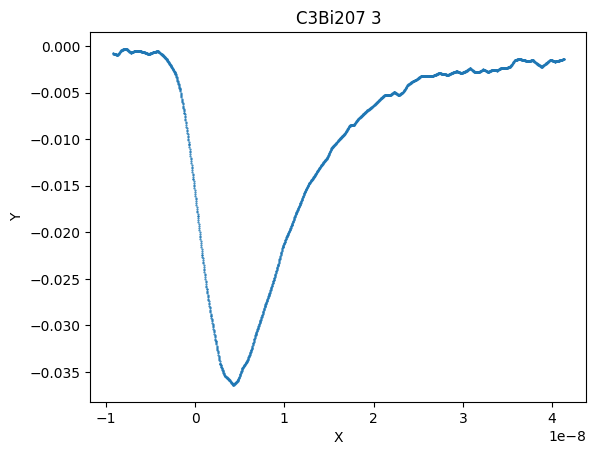

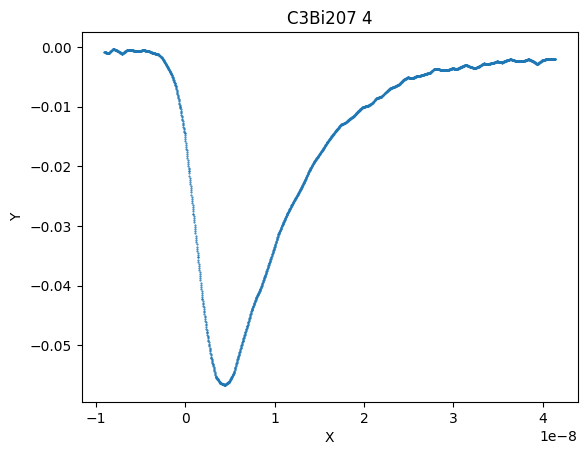

In [ ]:
# Loop through each file and plot the data

num_files = 5
start_num = 0

for i in range(num_files):
    plt.plot(C3Bi207_x[i], C3Bi207_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Bi207 ' + str(i + start_num))
    plt.show()

### 2. Peak and Peak Area Ratio

left_ratio  0.28049
peak_height  -0.0314617


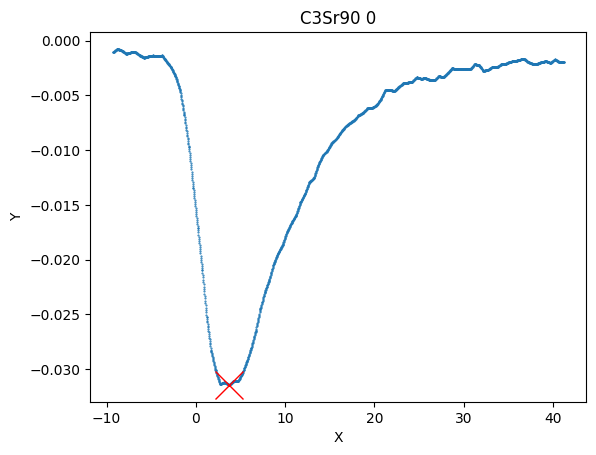

left_ratio  0.2689
peak_height  -0.0501334


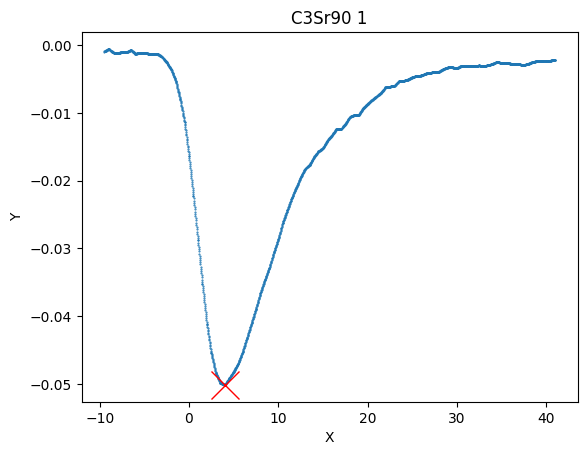

left_ratio  0.24755
peak_height  -0.0292227


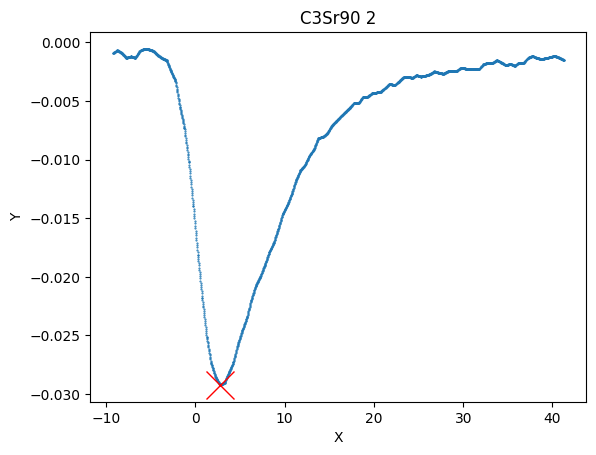

left_ratio  0.23463
peak_height  -0.0226257


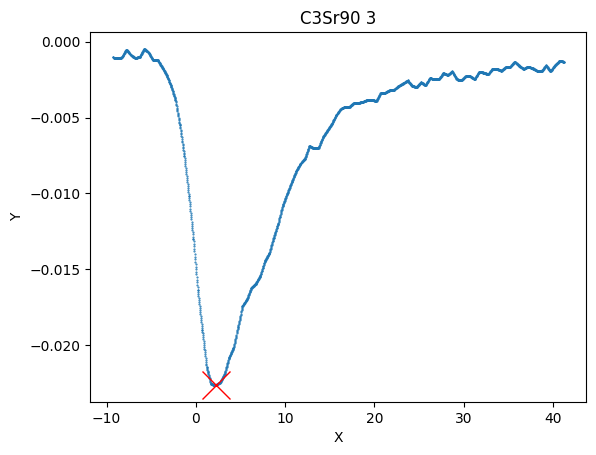

left_ratio  0.21216
peak_height  -0.0303422


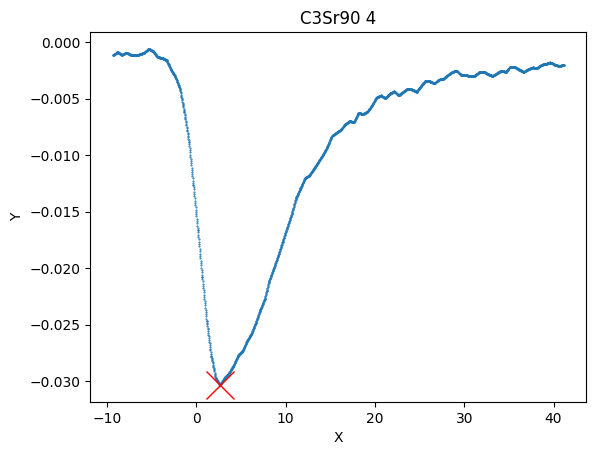

left_ratio  [0.28049 0.2689  0.24755 0.23463 0.21216]
peak_height  [-0.0314617 -0.0501334 -0.0292227 -0.0226257 -0.0303422]


In [ ]:
# Initialize an empty list to store the left areas
left_ratio_list = []
peak_height_list = []

for i in range(num_files):
    plt.plot(C3Sr90_x[i], C3Sr90_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Sr90 ' + str(i + start_num))
    
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Sr90_y[i])
    neg_peak_x = C3Sr90_x[i][np.argmin(C3Sr90_y[i])]
    
    # Find the minimum y and the corresponding x
    min_y = neg_peak_y
    min_x = neg_peak_x

    # Find the indices of the elements in x that are to the left and right of the peak
    left_indices = C3Sr90_x[i] < min_x
    right_indices = C3Sr90_x[i] > min_x

    # Calculate the areas of the scatter plot to the left and right of the peak using the trapezoidal rule
    left_area = np.trapz(C3Sr90_y[i][left_indices], C3Sr90_x[i][left_indices])
    right_area = np.trapz(C3Sr90_y[i][right_indices], C3Sr90_x[i][right_indices])

    # Calculate the ratio of the left area to the total area and round to 5 decimal places
    left_ratio = round(left_area / (left_area + right_area), 5)

    # Append the left area and peak height to the lists
    left_ratio_list.append(left_ratio)
    peak_height_list.append(min_y)
    
    print('left_ratio ', left_ratio)
    print('peak_height ', min_y)

    # Add a peak marker at the minimum y and highlight it
    plt.plot(min_x, min_y, 'rx', markersize=20, linewidth=100)
    plt.show()

    

# Convert the lists to numpy arrays
left_ratio_array = np.array(left_ratio_list)
peak_height_array = np.array(peak_height_list)

# Print the arrays
print('left_ratio ', left_ratio_array)
print('peak_height ', peak_height_array)

    

###3. Find the X% point from the peak

###3.1. 50%

0.009279999999999993 -0.01573085
11.309000000000001 -0.01573085


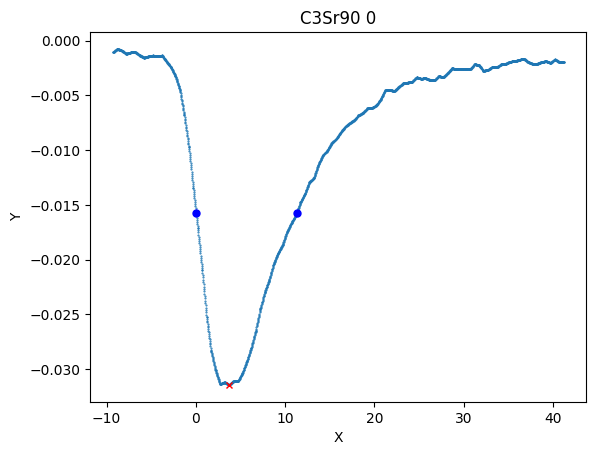

0.708018 -0.0250667
10.833 -0.0250667


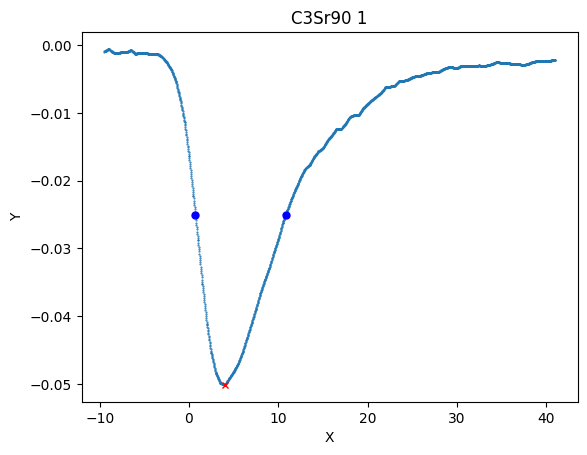

-0.15223 -0.01461135
9.82282 -0.01461135


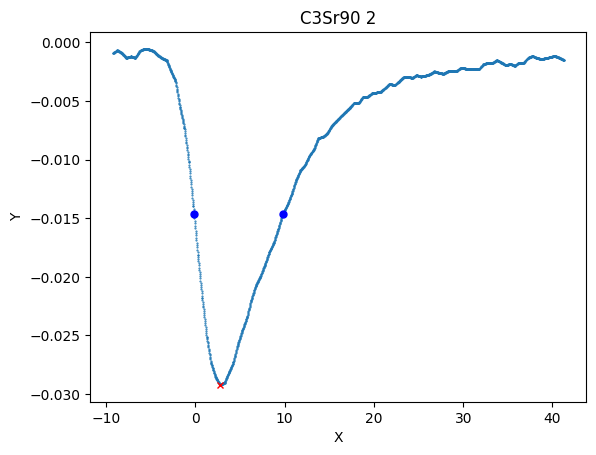

-0.58729 -0.01131285
9.512699999999999 -0.01131285


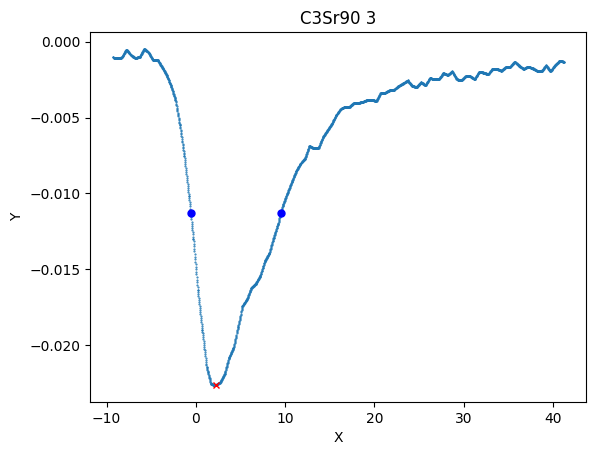

-0.04285000000000001 -0.0151711
10.682 -0.0151711


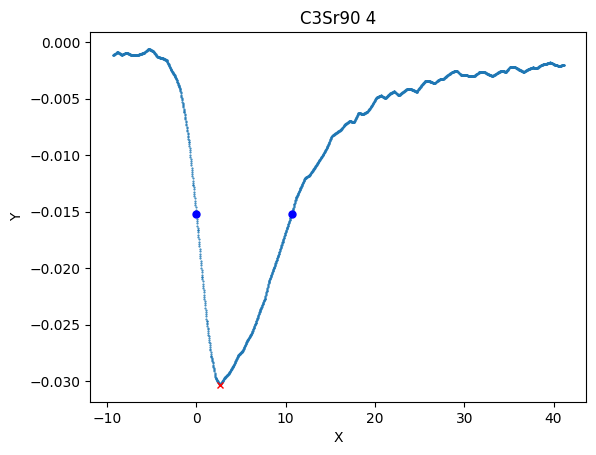

In [ ]:
num_files = 5
start_num = 0

for i in range(num_files):
    plt.plot(C3Sr90_x[i], C3Sr90_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Sr90 ' + str(i + start_num))
    
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Sr90_y[i])
    neg_peak_x = C3Sr90_x[i][np.argmin(C3Sr90_y[i])]
    
    # Find maximum 50% value
    max_50percent_y = neg_peak_y *0.5
    max_50percent_indices = np.where(C3Sr90_y[i] >= max_50percent_y)[0]
    left_indices = max_50percent_indices[max_50percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_50percent_indices[max_50percent_indices > np.argmin(C3Sr90_y[i])]
    max_50percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_50percent_x2 = C3Sr90_x[i][right_indices[0]]
    
    # Mark negative peak with red circle
    plt.plot(neg_peak_x, neg_peak_y, 'x', markersize=5, color='red')
    plt.plot(max_50percent_x1, max_50percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_50percent_x2, max_50percent_y, 'o', markersize=5, color='blue')
    print(max_50percent_x1, max_50percent_y)
    print(max_50percent_x2, max_50percent_y)
    
    plt.show()


###3.2. 10%

-2.3657 -0.00314617
27.984 -0.00314617


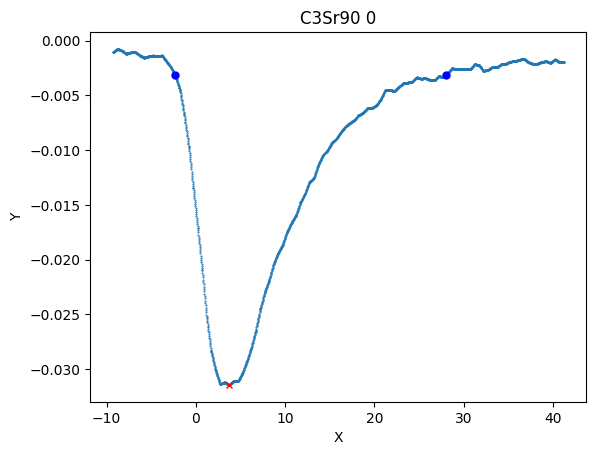

-1.5670000000000002 -0.005013340000000001
24.608 -0.005013340000000001


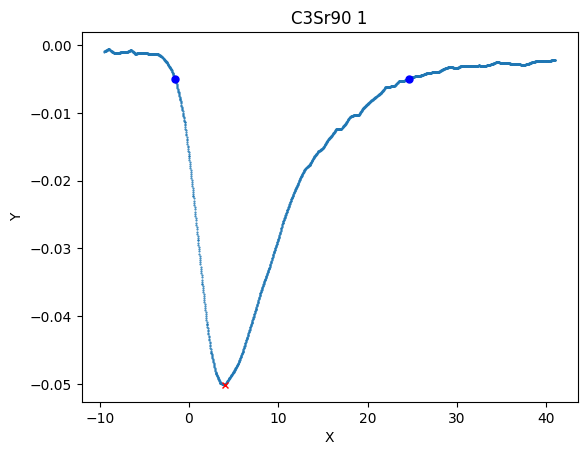

-2.4522 -0.0029222700000000002
23.748 -0.0029222700000000002


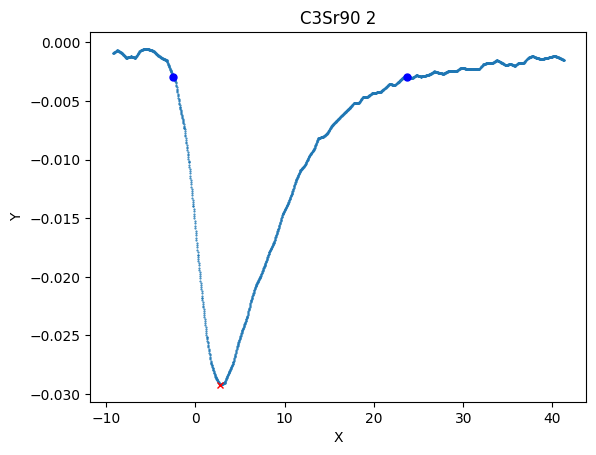

-3.2623 -0.0022625699999999998
27.488 -0.0022625699999999998


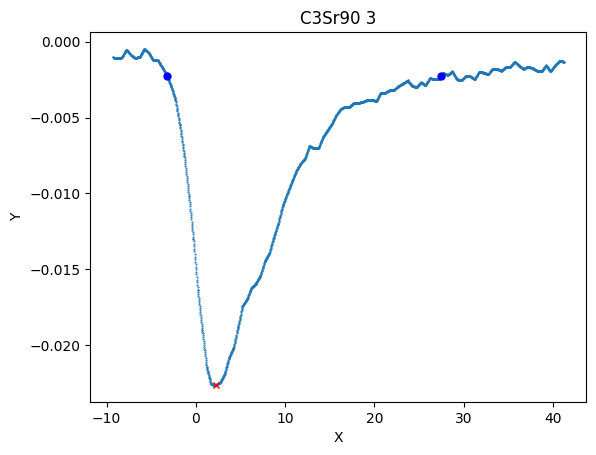

-2.3928 -0.0030342200000000002
27.982 -0.0030342200000000002


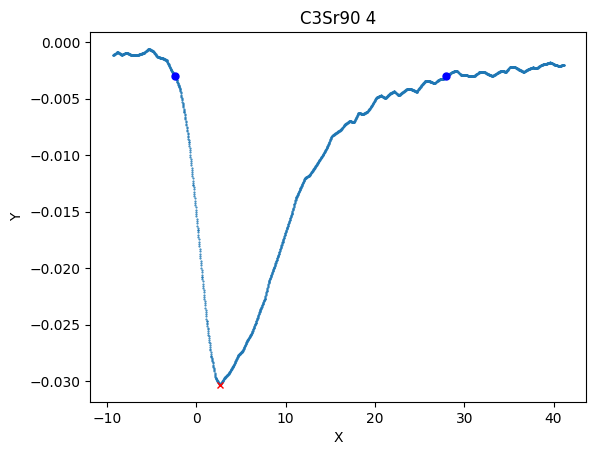

In [ ]:
num_files = 5
start_num = 0

for i in range(num_files):
    plt.plot(C3Sr90_x[i], C3Sr90_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Sr90 ' + str(i + start_num))
    
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Sr90_y[i])
    neg_peak_x = C3Sr90_x[i][np.argmin(C3Sr90_y[i])]
    
    # Find maximum 10% value
    max_10percent_y = neg_peak_y * 0.1
    max_10percent_indices = np.where(C3Sr90_y[i] >= max_10percent_y)[0]
    left_indices = max_10percent_indices[max_10percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_10percent_indices[max_10percent_indices > np.argmin(C3Sr90_y[i])]
    max_10percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_10percent_x2 = C3Sr90_x[i][right_indices[0]]
    
    # Mark negative peak with red circle
    plt.plot(neg_peak_x, neg_peak_y, 'x', markersize=5, color='red')
    plt.plot(max_10percent_x1, max_10percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_10percent_x2, max_10percent_y, 'o', markersize=5, color='blue')
    print(max_10percent_x1, max_10percent_y)
    print(max_10percent_x2, max_10percent_y)
    
    plt.show()


###3.3. 10%~90%

10% left ( -2.3657  , -0.00314617  )
10% right ( 27.984  , -0.00314617  )
20% left ( -1.4157  , -0.00629234  )
20% right ( 19.108999999999998  , -0.00629234  )
30% left ( -0.8657170000000001  , -0.00943851  )
30% right ( 15.159  , -0.00943851  )
40% left ( -0.41572000000000003  , -0.01258468  )
40% right ( 13.184  , -0.01258468  )
50% left ( -0.04285000000000001  , -0.016108601  )
50% right ( 10.682  , -0.016108601  )
60% left ( 0.43428  , -0.01887702  )
60% right ( 9.5843  , -0.01887702  )
70% left ( 0.809284  , -0.02202319  )
70% right ( 8.1593  , -0.02202319  )
80% left ( 1.1842989999999998  , -0.02516936  )
80% right ( 7.0593  , -0.02516936  )
90% left ( 1.6843000000000001  , -0.028315530000000002  )
90% right ( 6.1093  , -0.028315530000000002  )


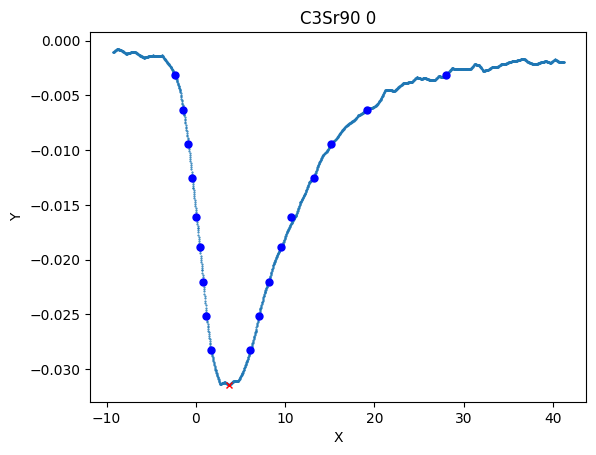

10% left ( -1.5670000000000002  , -0.005013340000000001  )
10% right ( 24.608  , -0.005013340000000001  )
20% left ( -0.6919700000000001  , -0.010026680000000001  )
20% right ( 19.157999999999998  , -0.010026680000000001  )
30% left ( -0.14197035000000002  , -0.01504002  )
30% right ( 15.083  , -0.01504002  )
40% left ( 0.3080298  , -0.020053360000000003  )
40% right ( 12.333  , -0.020053360000000003  )
50% left ( -0.04285000000000001  , -0.0253444955  )
50% right ( 10.682  , -0.0253444955  )
60% left ( 1.0830000000000002  , -0.03008004  )
60% right ( 9.658  , -0.03008004  )
70% left ( 1.4829999999999999  , -0.03509338  )
70% right ( 8.408  , -0.03509338  )
80% left ( 1.908  , -0.040106720000000005  )
80% right ( 7.2330000000000005  , -0.040106720000000005  )
90% left ( 2.458  , -0.045120060000000003  )
90% right ( 6.058000000000001  , -0.045120060000000003  )


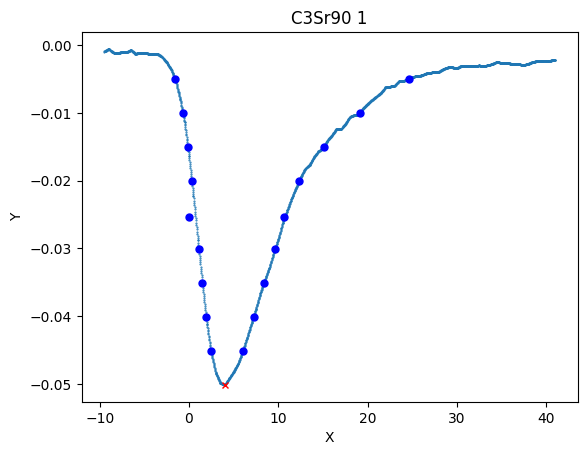

10% left ( -2.4522  , -0.0029222700000000002  )
10% right ( 23.748  , -0.0029222700000000002  )
20% left ( -1.6272  , -0.0058445400000000005  )
20% right ( 16.948  , -0.0058445400000000005  )
30% left ( -0.9772150000000002  , -0.00876681  )
30% right ( 13.473  , -0.00876681  )
40% left ( -0.55223  , -0.011689080000000001  )
40% right ( 11.323  , -0.011689080000000001  )
50% left ( -0.04285000000000001  , -0.014889145500000001  )
50% right ( 10.682  , -0.014889145500000001  )
60% left ( 0.19776999999999997  , -0.01753362  )
60% right ( 8.522799999999998  , -0.01753362  )
70% left ( 0.57277  , -0.02045589  )
70% right ( 6.972799999999999  , -0.02045589  )
80% left ( 0.9977834999999999  , -0.023378160000000002  )
80% right ( 5.822799999999999  , -0.023378160000000002  )
90% left ( 1.5228  , -0.02630043  )
90% right ( 4.5978  , -0.02630043  )


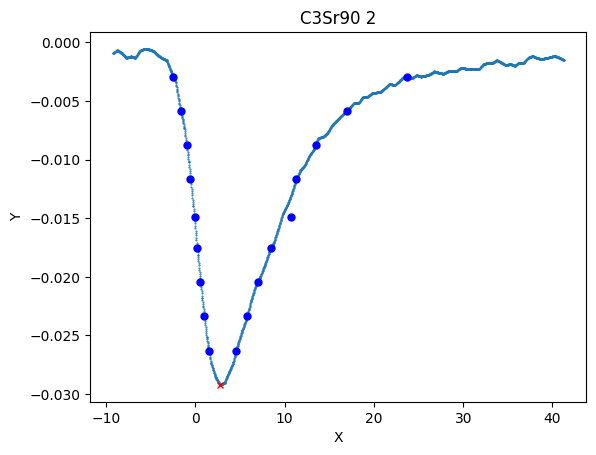

10% left ( -3.2623  , -0.0022625699999999998  )
10% right ( 27.488  , -0.0022625699999999998  )
20% left ( -2.0873  , -0.0045251399999999995  )
20% right ( 16.113  , -0.0045251399999999995  )
30% left ( -1.4873  , -0.00678771  )
30% right ( 13.888  , -0.00678771  )
40% left ( -1.0122945  , -0.009050279999999999  )
40% right ( 10.888  , -0.009050279999999999  )
50% left ( -0.04285000000000001  , -0.011550663499999999  )
50% right ( 10.682  , -0.011550663499999999  )
60% left ( -0.21229  , -0.01357542  )
60% right ( 8.412700000000001  , -0.01357542  )
70% left ( 0.11271000000000002  , -0.01583799  )
70% right ( 6.8377  , -0.01583799  )
80% left ( 0.53771  , -0.018100559999999998  )
80% right ( 4.9877  , -0.018100559999999998  )
90% left ( 0.9877045  , -0.02036313  )
90% right ( 4.087699999999999  , -0.02036313  )


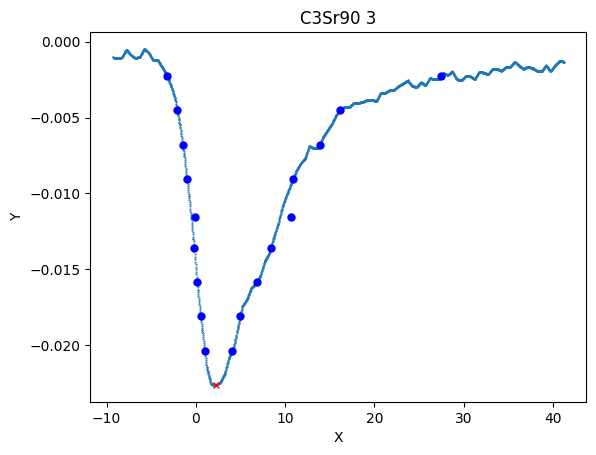

10% left ( -2.3928  , -0.0030342200000000002  )
10% right ( 27.982  , -0.0030342200000000002  )
20% left ( -1.3928  , -0.0060684400000000005  )
20% right ( 19.257  , -0.0060684400000000005  )
30% left ( -0.8178500000000001  , -0.00910266  )
30% right ( 14.757000000000001  , -0.00910266  )
40% left ( -0.41785  , -0.012136880000000001  )
40% right ( 12.107  , -0.012136880000000001  )
50% left ( -0.04285000000000001  , -0.0154688865  )
50% right ( 10.682  , -0.0154688865  )
60% left ( 0.33215  , -0.01820532  )
60% right ( 9.457199999999998  , -0.01820532  )
70% left ( 0.7071549999999999  , -0.021239539999999998  )
70% right ( 8.132200000000001  , -0.021239539999999998  )
80% left ( 1.0821925  , -0.024273760000000002  )
80% right ( 6.9072  , -0.024273760000000002  )
90% left ( 1.5822000000000003  , -0.02730798  )
90% right ( 5.182200000000001  , -0.02730798  )


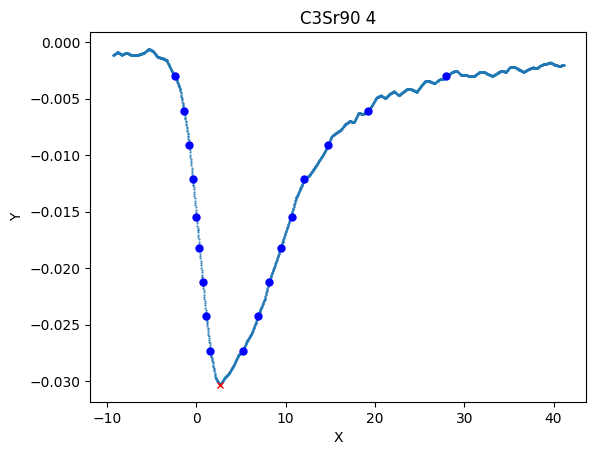

In [ ]:
num_files = 5
start_num = 0

#global variables
max_10percent_x1, max_10percent_x2, max_10percent_y,
max_20percent_x1, max_20percent_x2, max_20percent_y,
max_30percent_x1, max_30percent_x2, max_30percent_y,
max_40percent_x1, max_40percent_x2, max_40percent_y,
max_50percent_x1, max_50percent_x2, max_50percent_y,
max_60percent_x1, max_60percent_x2, max_60percent_y,
max_70percent_x1, max_70percent_x2, max_70percent_y,
max_80percent_x1, max_80percent_x2, max_80percent_y,
max_90percent_x1, max_90percent_x2, max_90percent_y

for i in range(num_files):
    plt.plot(C3Sr90_x[i], C3Sr90_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Sr90 ' + str(i + start_num))
    
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Sr90_y[i])
    neg_peak_x = C3Sr90_x[i][np.argmin(C3Sr90_y[i])]
    
    # Find maximum values at different percentages
    max_10percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.1
    max_20percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.2
    max_30percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.3
    max_40percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.4
    max_50percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.5
    max_60percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.6
    max_70percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.7
    max_80percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.8
    max_90percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.9
    
    max_10percent_indices = np.where(C3Sr90_y[i] >= max_10percent_y)[0]
    max_20percent_indices = np.where(C3Sr90_y[i] >= max_20percent_y)[0]
    max_30percent_indices = np.where(C3Sr90_y[i] >= max_30percent_y)[0]
    max_40percent_indices = np.where(C3Sr90_y[i] >= max_40percent_y)[0]
    max_50percent_indices = np.where(C3Sr90_y[i] >= max_50percent_y)[0]
    max_60percent_indices = np.where(C3Sr90_y[i] >= max_60percent_y)[0]
    max_70percent_indices = np.where(C3Sr90_y[i] >= max_70percent_y)[0]
    max_80percent_indices = np.where(C3Sr90_y[i] >= max_80percent_y)[0]
    max_90percent_indices = np.where(C3Sr90_y[i] >= max_90percent_y)[0]
    
    max_10percent_y = neg_peak_y * 0.1
    max_10percent_indices = np.where(C3Sr90_y[i] >= max_10percent_y)[0]
    left_indices = max_10percent_indices[max_10percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_10percent_indices[max_10percent_indices > np.argmin(C3Sr90_y[i])]
    max_10percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_10percent_x2 = C3Sr90_x[i][right_indices[0]]

    max_20percent_y = neg_peak_y * 0.2
    max_20percent_indices = np.where(C3Sr90_y[i] >= max_20percent_y)[0]
    left_indices = max_20percent_indices[max_20percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_20percent_indices[max_20percent_indices > np.argmin(C3Sr90_y[i])]
    max_20percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_20percent_x2 = C3Sr90_x[i][right_indices[0]]
        
    max_30percent_y = neg_peak_y * 0.3
    max_30percent_indices = np.where(C3Sr90_y[i] >= max_30percent_y)[0]
    left_indices = max_30percent_indices[max_30percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_30percent_indices[max_30percent_indices > np.argmin(C3Sr90_y[i])]
    max_30percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_30percent_x2 = C3Sr90_x[i][right_indices[0]]
        
    max_40percent_y = neg_peak_y * 0.4
    max_40percent_indices = np.where(C3Sr90_y[i] >= max_40percent_y)[0]
    left_indices = max_40percent_indices[max_40percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_40percent_indices[max_40percent_indices > np.argmin(C3Sr90_y[i])]
    max_40percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_40percent_x2 = C3Sr90_x[i][right_indices[0]]

    max_60percent_y = neg_peak_y * 0.6
    max_60percent_indices = np.where(C3Sr90_y[i] >= max_60percent_y)[0]
    left_indices = max_60percent_indices[max_60percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_60percent_indices[max_60percent_indices > np.argmin(C3Sr90_y[i])]
    max_60percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_60percent_x2 = C3Sr90_x[i][right_indices[0]]
        
    max_70percent_y = neg_peak_y * 0.7
    max_70percent_indices = np.where(C3Sr90_y[i] >= max_70percent_y)[0]
    left_indices = max_70percent_indices[max_70percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_70percent_indices[max_70percent_indices > np.argmin(C3Sr90_y[i])]
    max_70percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_70percent_x2 = C3Sr90_x[i][right_indices[0]]
        
    max_80percent_y = neg_peak_y * 0.8
    max_80percent_indices = np.where(C3Sr90_y[i] >= max_80percent_y)[0]
    left_indices = max_80percent_indices[max_80percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_80percent_indices[max_80percent_indices > np.argmin(C3Sr90_y[i])]
    max_80percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_80percent_x2 = C3Sr90_x[i][right_indices[0]]

    max_90percent_y = neg_peak_y * 0.9
    max_90percent_indices = np.where(C3Sr90_y[i] >= max_90percent_y)[0]
    left_indices = max_90percent_indices[max_90percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_90percent_indices[max_90percent_indices > np.argmin(C3Sr90_y[i])]
    max_90percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_90percent_x2 = C3Sr90_x[i][right_indices[0]]

    # Mark negative peak with red circle
    plt.plot(neg_peak_x, neg_peak_y, 'x', markersize=5, color='red')
    plt.plot(max_10percent_x1, max_10percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_10percent_x2, max_10percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_20percent_x1, max_20percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_20percent_x2, max_20percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_30percent_x1, max_30percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_30percent_x2, max_30percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_40percent_x1, max_40percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_40percent_x2, max_40percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_50percent_x1, max_50percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_50percent_x2, max_50percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_60percent_x1, max_60percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_60percent_x2, max_60percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_70percent_x1, max_70percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_70percent_x2, max_70percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_80percent_x1, max_80percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_80percent_x2, max_80percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_90percent_x1, max_90percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_90percent_x2, max_90percent_y, 'o', markersize=5, color='blue')

    print('10% left (', max_10percent_x1, ' ,', max_10percent_y, ' )')
    print('10% right (',max_10percent_x2, ' ,', max_10percent_y, ' )')
    
    print('20% left (', max_20percent_x1, ' ,', max_20percent_y, ' )')
    print('20% right (',max_20percent_x2, ' ,', max_20percent_y, ' )')

    print('30% left (', max_30percent_x1, ' ,', max_30percent_y, ' )')
    print('30% right (',max_30percent_x2, ' ,', max_30percent_y, ' )')

    print('40% left (', max_40percent_x1, ' ,', max_40percent_y, ' )')
    print('40% right (',max_40percent_x2, ' ,', max_40percent_y, ' )')

    print('50% left (', max_50percent_x1, ' ,', max_50percent_y, ' )')
    print('50% right (',max_50percent_x2, ' ,', max_50percent_y, ' )')

    print('60% left (', max_60percent_x1, ' ,', max_60percent_y, ' )')
    print('60% right (',max_60percent_x2, ' ,', max_60percent_y, ' )')

    print('70% left (', max_70percent_x1, ' ,', max_70percent_y, ' )')
    print('70% right (',max_70percent_x2, ' ,', max_70percent_y, ' )')

    print('80% left (', max_80percent_x1, ' ,', max_80percent_y, ' )')
    print('80% right (',max_80percent_x2, ' ,', max_80percent_y, ' )')

    print('90% left (', max_90percent_x1, ' ,', max_90percent_y, ' )')
    print('90% right (',max_90percent_x2, ' ,', max_90percent_y, ' )')

    
    plt.show()

10% left ( -2.3657  , -0.00314617  )
10% right ( 27.984  , -0.00314617  )
20% left ( -1.4157  , -0.00629234  )
20% right ( 19.108999999999998  , -0.00629234  )
30% left ( -0.8657170000000001  , -0.00943851  )
30% right ( 15.159  , -0.00943851  )
40% left ( -0.41572000000000003  , -0.01258468  )
40% right ( 13.184  , -0.01258468  )
50% left ( -0.04285000000000001  , -0.016108601  )
50% right ( 10.682  , -0.016108601  )
60% left ( 0.43428  , -0.01887702  )
60% right ( 9.5843  , -0.01887702  )
70% left ( 0.809284  , -0.02202319  )
70% right ( 8.1593  , -0.02202319  )
80% left ( 1.1842989999999998  , -0.02516936  )
80% right ( 7.0593  , -0.02516936  )
90% left ( 1.6843000000000001  , -0.028315530000000002  )
90% right ( 6.1093  , -0.028315530000000002  )
10% slope left: -0.001599280000000005


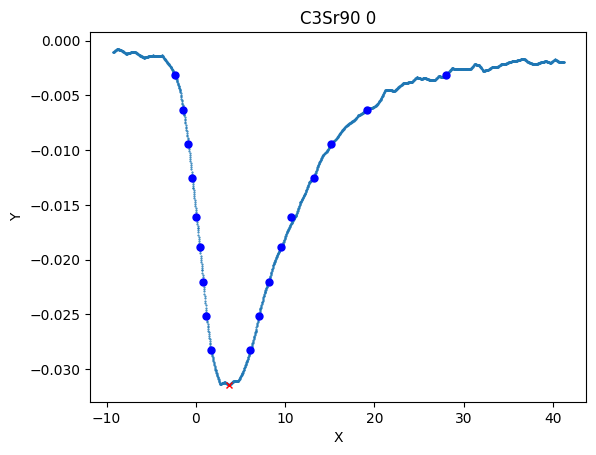

10% left ( -1.5670000000000002  , -0.005013340000000001  )
10% right ( 24.608  , -0.005013340000000001  )
20% left ( -0.6919700000000001  , -0.010026680000000001  )
20% right ( 19.157999999999998  , -0.010026680000000001  )
30% left ( -0.14197035000000002  , -0.01504002  )
30% right ( 15.083  , -0.01504002  )
40% left ( 0.3080298  , -0.020053360000000003  )
40% right ( 12.333  , -0.020053360000000003  )
50% left ( -0.04285000000000001  , -0.0253444955  )
50% right ( 10.682  , -0.0253444955  )
60% left ( 1.0830000000000002  , -0.03008004  )
60% right ( 9.658  , -0.03008004  )
70% left ( 1.4829999999999999  , -0.03509338  )
70% right ( 8.408  , -0.03509338  )
80% left ( 1.908  , -0.040106720000000005  )
80% right ( 7.2330000000000005  , -0.040106720000000005  )
90% left ( 2.458  , -0.045120060000000003  )
90% right ( 6.058000000000001  , -0.045120060000000003  )
10% slope left: -0.003358500000000014


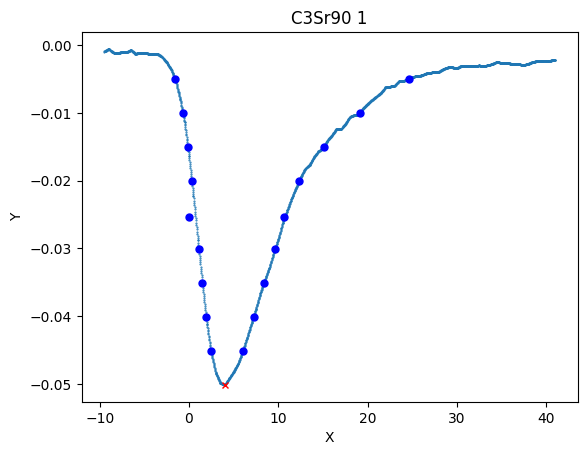

10% left ( -2.4522  , -0.0029222700000000002  )
10% right ( 23.748  , -0.0029222700000000002  )
20% left ( -1.6272  , -0.0058445400000000005  )
20% right ( 16.948  , -0.0058445400000000005  )
30% left ( -0.9772150000000002  , -0.00876681  )
30% right ( 13.473  , -0.00876681  )
40% left ( -0.55223  , -0.011689080000000001  )
40% right ( 11.323  , -0.011689080000000001  )
50% left ( -0.04285000000000001  , -0.014889145500000001  )
50% right ( 10.682  , -0.014889145500000001  )
60% left ( 0.19776999999999997  , -0.01753362  )
60% right ( 8.522799999999998  , -0.01753362  )
70% left ( 0.57277  , -0.02045589  )
70% right ( 6.972799999999999  , -0.02045589  )
80% left ( 0.9977834999999999  , -0.023378160000000002  )
80% right ( 5.822799999999999  , -0.023378160000000002  )
90% left ( 1.5228  , -0.02630043  )
90% right ( 4.5978  , -0.02630043  )
10% slope left: -0.0015992800000000063


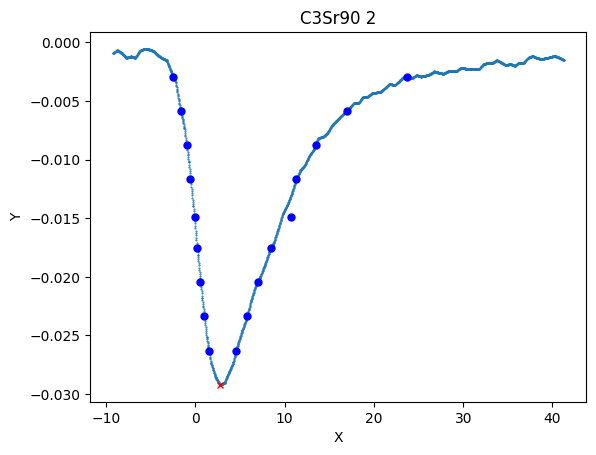

10% left ( -3.2623  , -0.0022625699999999998  )
10% right ( 27.488  , -0.0022625699999999998  )
20% left ( -2.0873  , -0.0045251399999999995  )
20% right ( 16.113  , -0.0045251399999999995  )
30% left ( -1.4873  , -0.00678771  )
30% right ( 13.888  , -0.00678771  )
40% left ( -1.0122945  , -0.009050279999999999  )
40% right ( 10.888  , -0.009050279999999999  )
50% left ( -0.04285000000000001  , -0.011550663499999999  )
50% right ( 10.682  , -0.011550663499999999  )
60% left ( -0.21229  , -0.01357542  )
60% right ( 8.412700000000001  , -0.01357542  )
70% left ( 0.11271000000000002  , -0.01583799  )
70% right ( 6.8377  , -0.01583799  )
80% left ( 0.53771  , -0.018100559999999998  )
80% right ( 4.9877  , -0.018100559999999998  )
90% left ( 0.9877045  , -0.02036313  )
90% right ( 4.087699999999999  , -0.02036313  )
10% slope left: -0.0013119817077175834


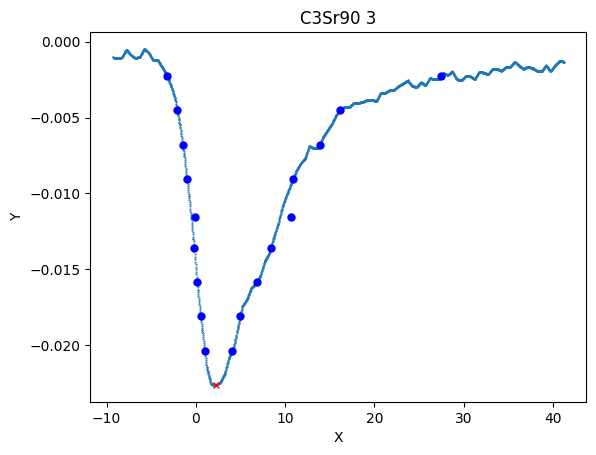

10% left ( -2.3928  , -0.0030342200000000002  )
10% right ( 27.982  , -0.0030342200000000002  )
20% left ( -1.3928  , -0.0060684400000000005  )
20% right ( 19.257  , -0.0060684400000000005  )
30% left ( -0.8178500000000001  , -0.00910266  )
30% right ( 14.757000000000001  , -0.00910266  )
40% left ( -0.41785  , -0.012136880000000001  )
40% right ( 12.107  , -0.012136880000000001  )
50% left ( -0.04285000000000001  , -0.0154688865  )
50% right ( 10.682  , -0.0154688865  )
60% left ( 0.33215  , -0.01820532  )
60% right ( 9.457199999999998  , -0.01820532  )
70% left ( 0.7071549999999999  , -0.021239539999999998  )
70% right ( 8.132200000000001  , -0.021239539999999998  )
80% left ( 1.0821925  , -0.024273760000000002  )
80% right ( 6.9072  , -0.024273760000000002  )
90% left ( 1.5822000000000003  , -0.02730798  )
90% right ( 5.182200000000001  , -0.02730798  )
10% slope left: -0.0013228670190895716


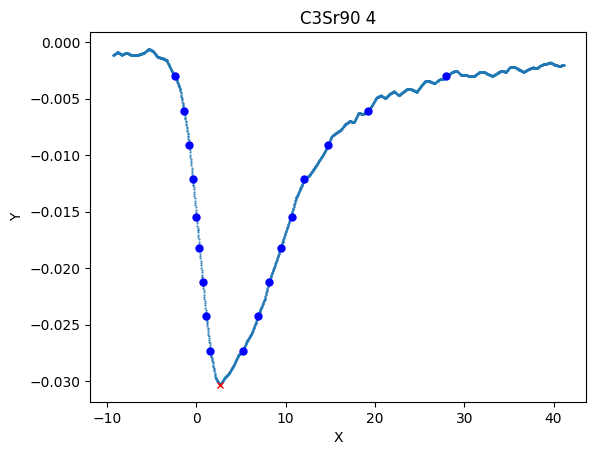

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_files = 5
start_num = 0

for i in range(num_files):
    plt.plot(C3Sr90_x[i], C3Sr90_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Sr90 ' + str(i + start_num))
  
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Sr90_y[i])
    neg_peak_x = C3Sr90_x[i][np.argmin(C3Sr90_y[i])]
    
    # Find maximum values at different percentages
    max_10percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.1
    max_20percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.2
    max_30percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.3
    max_40percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.4
    max_50percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.5
    max_60percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.6
    max_70percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.7
    max_80percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.8
    max_90percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.9
    
    max_10percent_indices = np.where(C3Sr90_y[i] >= max_10percent_y)[0]
    max_20percent_indices = np.where(C3Sr90_y[i] >= max_20percent_y)[0]
    max_30percent_indices = np.where(C3Sr90_y[i] >= max_30percent_y)[0]
    max_40percent_indices = np.where(C3Sr90_y[i] >= max_40percent_y)[0]
    max_50percent_indices = np.where(C3Sr90_y[i] >= max_50percent_y)[0]
    max_60percent_indices = np.where(C3Sr90_y[i] >= max_60percent_y)[0]
    max_70percent_indices = np.where(C3Sr90_y[i] >= max_70percent_y)[0]
    max_80percent_indices = np.where(C3Sr90_y[i] >= max_80percent_y)[0]
    max_90percent_indices = np.where(C3Sr90_y[i] >= max_90percent_y)[0]
    
    max_10percent_y = neg_peak_y * 0.1
    max_10percent_indices = np.where(C3Sr90_y[i] >= max_10percent_y)[0]
    left_indices = max_10percent_indices[max_10percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_10percent_indices[max_10percent_indices > np.argmin(C3Sr90_y[i])]
    max_10percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_10percent_x2 = C3Sr90_x[i][right_indices[0]]
    
    max_20percent_y = neg_peak_y * 0.2
    max_20percent_indices = np.where(C3Sr90_y[i] >= max_20percent_y)[0]
    left_indices = max_20percent_indices[max_20percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_20percent_indices[max_20percent_indices > np.argmin(C3Sr90_y[i])]
    max_20percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_20percent_x2 = C3Sr90_x[i][right_indices[0]]
        
    max_30percent_y = neg_peak_y * 0.3
    max_30percent_indices = np.where(C3Sr90_y[i] >= max_30percent_y)[0]
    left_indices = max_30percent_indices[max_30percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_30percent_indices[max_30percent_indices > np.argmin(C3Sr90_y[i])]
    max_30percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_30percent_x2 = C3Sr90_x[i][right_indices[0]]
        
    max_40percent_y = neg_peak_y * 0.4
    max_40percent_indices = np.where(C3Sr90_y[i] >= max_40percent_y)[0]
    left_indices = max_40percent_indices[max_40percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_40percent_indices[max_40percent_indices > np.argmin(C3Sr90_y[i])]
    max_40percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_40percent_x2 = C3Sr90_x[i][right_indices[0]]

    max_60percent_y = neg_peak_y * 0.6
    max_60percent_indices = np.where(C3Sr90_y[i] >= max_60percent_y)[0]
    left_indices = max_60percent_indices[max_60percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_60percent_indices[max_60percent_indices > np.argmin(C3Sr90_y[i])]
    max_60percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_60percent_x2 = C3Sr90_x[i][right_indices[0]]
        
    max_70percent_y = neg_peak_y * 0.7
    max_70percent_indices = np.where(C3Sr90_y[i] >= max_70percent_y)[0]
    left_indices = max_70percent_indices[max_70percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_70percent_indices[max_70percent_indices > np.argmin(C3Sr90_y[i])]
    max_70percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_70percent_x2 = C3Sr90_x[i][right_indices[0]]
        
    max_80percent_y = neg_peak_y * 0.8
    max_80percent_indices = np.where(C3Sr90_y[i] >= max_80percent_y)[0]
    left_indices = max_80percent_indices[max_80percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_80percent_indices[max_80percent_indices > np.argmin(C3Sr90_y[i])]
    max_80percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_80percent_x2 = C3Sr90_x[i][right_indices[0]]

    max_90percent_y = neg_peak_y * 0.9
    max_90percent_indices = np.where(C3Sr90_y[i] >= max_90percent_y)[0]
    left_indices = max_90percent_indices[max_90percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_90percent_indices[max_90percent_indices > np.argmin(C3Sr90_y[i])]
    max_90percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_90percent_x2 = C3Sr90_x[i][right_indices[0]]

    # Mark negative peak with red circle
    plt.plot(neg_peak_x, neg_peak_y, 'x', markersize=5, color='red')
    plt.plot(max_10percent_x1, max_10percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_10percent_x2, max_10percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_20percent_x1, max_20percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_20percent_x2, max_20percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_30percent_x1, max_30percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_30percent_x2, max_30percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_40percent_x1, max_40percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_40percent_x2, max_40percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_50percent_x1, max_50percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_50percent_x2, max_50percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_60percent_x1, max_60percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_60percent_x2, max_60percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_70percent_x1, max_70percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_70percent_x2, max_70percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_80percent_x1, max_80percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_80percent_x2, max_80percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_90percent_x1, max_90percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_90percent_x2, max_90percent_y, 'o', markersize=5, color='blue')

    print('10% left (', max_10percent_x1, ' ,', max_10percent_y, ' )')
    print('10% right (',max_10percent_x2, ' ,', max_10percent_y, ' )')
    
    print('20% left (', max_20percent_x1, ' ,', max_20percent_y, ' )')
    print('20% right (',max_20percent_x2, ' ,', max_20percent_y, ' )')

    print('30% left (', max_30percent_x1, ' ,', max_30percent_y, ' )')
    print('30% right (',max_30percent_x2, ' ,', max_30percent_y, ' )')

    print('40% left (', max_40percent_x1, ' ,', max_40percent_y, ' )')
    print('40% right (',max_40percent_x2, ' ,', max_40percent_y, ' )')

    print('50% left (', max_50percent_x1, ' ,', max_50percent_y, ' )')
    print('50% right (',max_50percent_x2, ' ,', max_50percent_y, ' )')

    print('60% left (', max_60percent_x1, ' ,', max_60percent_y, ' )')
    print('60% right (',max_60percent_x2, ' ,', max_60percent_y, ' )')

    print('70% left (', max_70percent_x1, ' ,', max_70percent_y, ' )')
    print('70% right (',max_70percent_x2, ' ,', max_70percent_y, ' )')

    print('80% left (', max_80percent_x1, ' ,', max_80percent_y, ' )')
    print('80% right (',max_80percent_x2, ' ,', max_80percent_y, ' )')

    print('90% left (', max_90percent_x1, ' ,', max_90percent_y, ' )')
    print('90% right (',max_90percent_x2, ' ,', max_90percent_y, ' )')

    #--------------------------------------------------------------------------------------------

    # Define a window size for selecting nearby points
    window_size = 5

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_10percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope = coeffs[0]

    print('10% slope left:', slope)
    
    # Show plot
    plt.show()

10% slope left: -1.903964895263963
10% slope right: 0.6706002669192308
20% slope left: -4.934339388924087
20% slope right: 0.5558959212544711
30% slope left: -6.360768074071384
30% slope right: 1.1492247187024809
40% slope left: -7.306447257376657
40% slope right: 1.49090075953621
50% slope left: -7.306447257376657
50% slope right: 1.49090075953621
60% slope left: -7.72780416957339
60% slope right: 1.7939902649689816
70% slope left: -8.194221183225332
70% slope right: 2.5314688291941128
80% slope left: -7.5568667182161455
80% slope right: 3.6596411764705934
90% slope left: -5.077061565918927
90% slope right: 2.6757759502301015


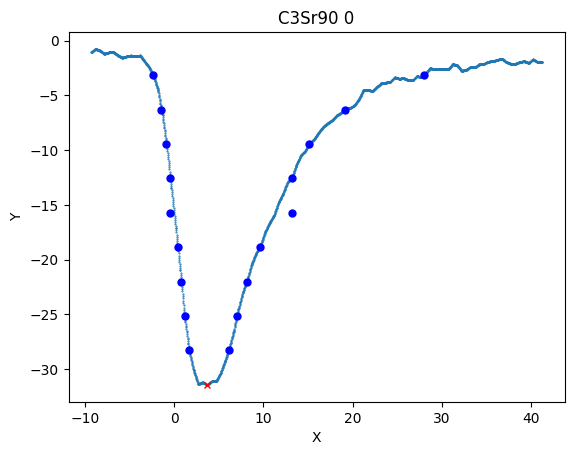

10% slope left: -4.049144125926335
10% slope right: 0.5504303177728732
20% slope left: -7.256253692054078
20% slope right: 1.3844920933812292
30% slope left: -10.274483405119057
30% slope right: 1.7274595032944808
40% slope left: -11.933710108605492
40% slope right: 2.937899072005497
50% slope left: -11.933710108605492
50% slope right: 2.937899072005497
60% slope left: -12.911081577000827
60% slope right: 4.126957952796307
70% slope left: -12.383165232518905
70% slope right: 3.8355305778080866
80% slope left: -10.854986040565883
80% slope right: 4.3293134847702515
90% slope left: -7.549530816016215
90% slope right: 3.90558828264157


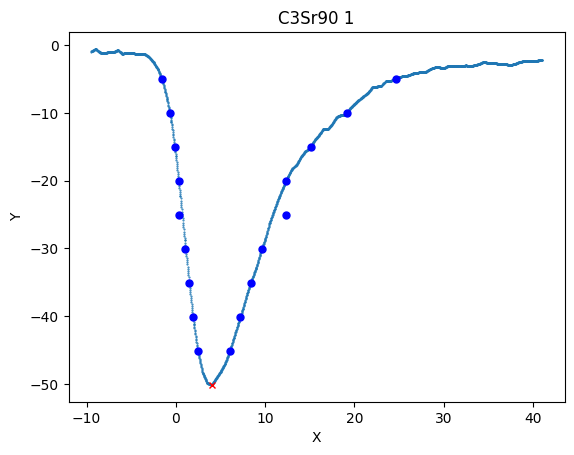

10% slope left: -2.10294205183399
10% slope right: -0.009938706267853679
20% slope left: -3.9313934493661993
20% slope right: 0.7303637310924367
30% slope left: -5.75531907506143
30% slope right: 1.5851168241965972
40% slope left: -7.154248467526991
40% slope right: 1.9856347924718527
50% slope left: -7.154248467526991
50% slope right: 1.9856347924718527
60% slope left: -7.90625051094891
60% slope right: 1.7896408989151074
70% slope left: -7.315115459118576
70% slope right: 1.7588870080769916
80% slope left: -6.544925376676617
80% slope right: 2.6585836330028654
90% slope left: -4.604273093539427
90% slope right: 2.8196945523285777


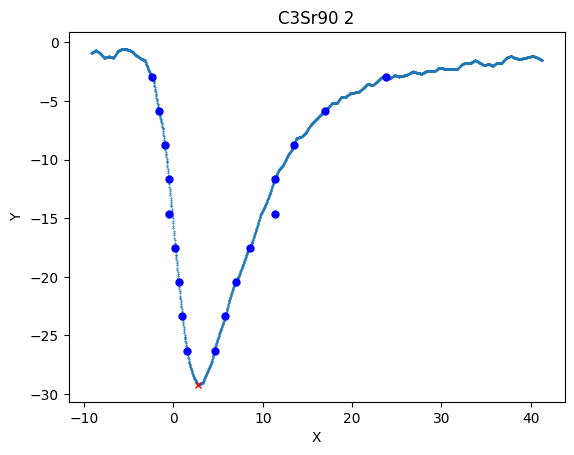

10% slope left: -1.2534633839986646
10% slope right: 0.5194445264336183
20% slope left: -3.07355329438048
20% slope right: 0.6571463507755234
30% slope left: -4.1748157826347105
30% slope right: 1.032447899159664
40% slope left: -5.168278612257728
40% slope right: 1.4331512100840385
50% slope left: -5.168278612257728
50% slope right: 1.4331512100840385
60% slope left: -6.292784566649785
60% slope right: 1.8245724523113924
70% slope left: -6.216433748082487
70% slope right: 0.9127592807226845
80% slope left: -5.332224038120386
80% slope right: 2.4724806268296913
90% slope left: -4.554829586934443
90% slope right: 1.7393913545407935


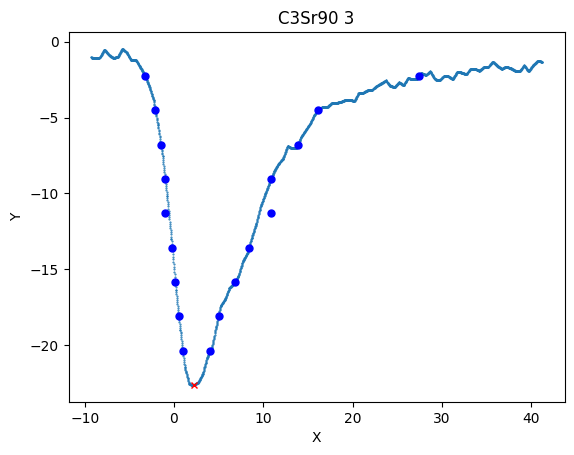

10% slope left: -1.5986455499239733
10% slope right: 0.5796303883828827
20% slope left: -4.547275977985916
20% slope right: 0.8658953033440898
30% slope left: -6.524401059109058
30% slope right: 1.7199682658292328
40% slope left: -7.742312889006549
40% slope right: 1.3016102889001557
50% slope left: -7.742312889006549
50% slope right: 1.3016102889001557
60% slope left: -8.196660007031054
60% slope right: 2.4524614467144454
70% slope left: -7.991149311553925
70% slope right: 2.747963569148034
80% slope left: -7.193081894520226
80% slope right: 2.1667683571551586
90% slope left: -5.413818583952326
90% slope right: 1.3130589276766271


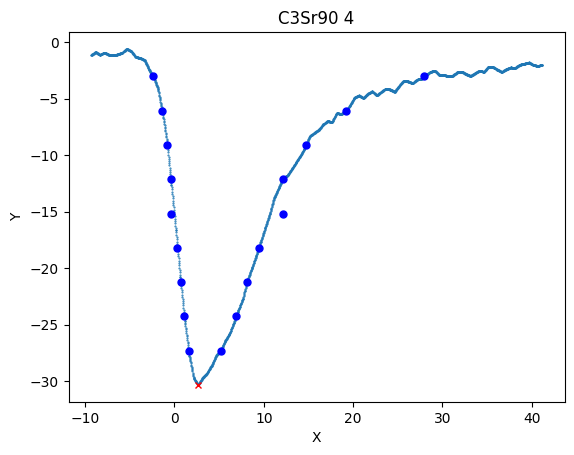

slope_10percent_left_list,  [-1.9039649  -4.04914413 -2.10294205 -1.25346338 -1.59864555]
slope_10percent_right_list,  [ 0.67060027  0.55043032 -0.00993871  0.51944453  0.57963039]
slope_20percent_left_list,  [-4.93433939 -7.25625369 -3.93139345 -3.07355329 -4.54727598]
slope_20percent_right_list,  [0.55589592 1.38449209 0.73036373 0.65714635 0.8658953 ]
slope_30percent_left_list,  [ -6.36076807 -10.27448341  -5.75531908  -4.17481578  -6.52440106]
slope_30percent_right_list,  [1.14922472 1.7274595  1.58511682 1.0324479  1.71996827]
slope_40percent_left_list,  [ -7.30644726 -11.93371011  -7.15424847  -5.16827861  -7.74231289]
slope_40percent_right_list,  [1.49090076 2.93789907 1.98563479 1.43315121 1.30161029]
slope_50percent_left_list,  [ -7.30644726 -11.93371011  -7.15424847  -5.16827861  -7.74231289]
slope_50percent_right_list,  [1.49090076 2.93789907 1.98563479 1.43315121 1.30161029]
slope_60percent_left_list,  [ -7.72780417 -12.91108158  -7.90625051  -6.29278457  -8.19666001]
slope

In [8]:
import numpy as np
import matplotlib.pyplot as plt

num_files = 5
start_num = 0

slope_10percent_left_list = []
slope_20percent_left_list = []
slope_30percent_left_list = []
slope_40percent_left_list = []
slope_50percent_left_list = []
slope_60percent_left_list = []
slope_70percent_left_list = []
slope_80percent_left_list = []
slope_90percent_left_list = []

slope_10percent_right_list = []
slope_20percent_right_list = []
slope_30percent_right_list = []
slope_40percent_right_list = []
slope_50percent_right_list = []
slope_60percent_right_list = []
slope_70percent_right_list = []
slope_80percent_right_list = []
slope_90percent_right_list = []

for i in range(num_files):
    plt.plot(C3Sr90_x[i], C3Sr90_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Sr90 ' + str(i + start_num))
  
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Sr90_y[i])
    neg_peak_x = C3Sr90_x[i][np.argmin(C3Sr90_y[i])]
    
    # Find maximum values at different percentages
    max_10percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.1
    max_20percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.2
    max_30percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.3
    max_40percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.4
    max_50percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.5
    max_60percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.6
    max_70percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.7
    max_80percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.8
    max_90percent_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * 0.9
    
    max_10percent_indices = np.where(C3Sr90_y[i] >= max_10percent_y)[0]
    max_20percent_indices = np.where(C3Sr90_y[i] >= max_20percent_y)[0]
    max_30percent_indices = np.where(C3Sr90_y[i] >= max_30percent_y)[0]
    max_40percent_indices = np.where(C3Sr90_y[i] >= max_40percent_y)[0]
    max_50percent_indices = np.where(C3Sr90_y[i] >= max_50percent_y)[0]
    max_60percent_indices = np.where(C3Sr90_y[i] >= max_60percent_y)[0]
    max_70percent_indices = np.where(C3Sr90_y[i] >= max_70percent_y)[0]
    max_80percent_indices = np.where(C3Sr90_y[i] >= max_80percent_y)[0]
    max_90percent_indices = np.where(C3Sr90_y[i] >= max_90percent_y)[0]
    
    max_10percent_y = neg_peak_y * 0.1
    max_10percent_indices = np.where(C3Sr90_y[i] >= max_10percent_y)[0]
    left_indices = max_10percent_indices[max_10percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_10percent_indices[max_10percent_indices > np.argmin(C3Sr90_y[i])]
    max_10percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_10percent_x2 = C3Sr90_x[i][right_indices[0]]
    
    max_20percent_y = neg_peak_y * 0.2
    max_20percent_indices = np.where(C3Sr90_y[i] >= max_20percent_y)[0]
    left_indices = max_20percent_indices[max_20percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_20percent_indices[max_20percent_indices > np.argmin(C3Sr90_y[i])]
    max_20percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_20percent_x2 = C3Sr90_x[i][right_indices[0]]
        
    max_30percent_y = neg_peak_y * 0.3
    max_30percent_indices = np.where(C3Sr90_y[i] >= max_30percent_y)[0]
    left_indices = max_30percent_indices[max_30percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_30percent_indices[max_30percent_indices > np.argmin(C3Sr90_y[i])]
    max_30percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_30percent_x2 = C3Sr90_x[i][right_indices[0]]
        
    max_40percent_y = neg_peak_y * 0.4
    max_40percent_indices = np.where(C3Sr90_y[i] >= max_40percent_y)[0]
    left_indices = max_40percent_indices[max_40percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_40percent_indices[max_40percent_indices > np.argmin(C3Sr90_y[i])]
    max_40percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_40percent_x2 = C3Sr90_x[i][right_indices[0]]

    max_50percent_y = neg_peak_y * 0.5
    max_50percent_indices = np.where(C3Sr90_y[i] >= max_40percent_y)[0]
    left_indices = max_50percent_indices[max_50percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_50percent_indices[max_50percent_indices > np.argmin(C3Sr90_y[i])]
    max_50percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_50percent_x2 = C3Sr90_x[i][right_indices[0]]

    max_60percent_y = neg_peak_y * 0.6
    max_60percent_indices = np.where(C3Sr90_y[i] >= max_60percent_y)[0]
    left_indices = max_60percent_indices[max_60percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_60percent_indices[max_60percent_indices > np.argmin(C3Sr90_y[i])]
    max_60percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_60percent_x2 = C3Sr90_x[i][right_indices[0]]
        
    max_70percent_y = neg_peak_y * 0.7
    max_70percent_indices = np.where(C3Sr90_y[i] >= max_70percent_y)[0]
    left_indices = max_70percent_indices[max_70percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_70percent_indices[max_70percent_indices > np.argmin(C3Sr90_y[i])]
    max_70percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_70percent_x2 = C3Sr90_x[i][right_indices[0]]
        
    max_80percent_y = neg_peak_y * 0.8
    max_80percent_indices = np.where(C3Sr90_y[i] >= max_80percent_y)[0]
    left_indices = max_80percent_indices[max_80percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_80percent_indices[max_80percent_indices > np.argmin(C3Sr90_y[i])]
    max_80percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_80percent_x2 = C3Sr90_x[i][right_indices[0]]

    max_90percent_y = neg_peak_y * 0.9
    max_90percent_indices = np.where(C3Sr90_y[i] >= max_90percent_y)[0]
    left_indices = max_90percent_indices[max_90percent_indices < np.argmin(C3Sr90_y[i])]
    right_indices = max_90percent_indices[max_90percent_indices > np.argmin(C3Sr90_y[i])]
    max_90percent_x1 = C3Sr90_x[i][left_indices[-1]]
    max_90percent_x2 = C3Sr90_x[i][right_indices[0]]

    # Mark negative peak with red circle
    plt.plot(neg_peak_x, neg_peak_y, 'x', markersize=5, color='red')
    plt.plot(max_10percent_x1, max_10percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_10percent_x2, max_10percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_20percent_x1, max_20percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_20percent_x2, max_20percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_30percent_x1, max_30percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_30percent_x2, max_30percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_40percent_x1, max_40percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_40percent_x2, max_40percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_50percent_x1, max_50percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_50percent_x2, max_50percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_60percent_x1, max_60percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_60percent_x2, max_60percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_70percent_x1, max_70percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_70percent_x2, max_70percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_80percent_x1, max_80percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_80percent_x2, max_80percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_90percent_x1, max_90percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_90percent_x2, max_90percent_y, 'o', markersize=5, color='blue')

    #--------------------------------------------------------------------------------------------

    # Define a window size for selecting nearby points
    window_size = 21

    ###10%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_10percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]

    print('10% slope left:', slope_left)
    slope_10percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_10percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]

    print('10% slope right:', slope_right)
    slope_10percent_right_list.append(slope_right)


    ###20%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_20percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]

    print('20% slope left:', slope_left)
    slope_20percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_20percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]

    print('20% slope right:', slope_right)
    slope_20percent_right_list.append(slope_right)

    ###30%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_30percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]

    print('30% slope left:', slope_left)
    slope_30percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_30percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]

    print('30% slope right:', slope_right)
    slope_30percent_right_list.append(slope_right)

    ###40%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_40percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]

    print('40% slope left:', slope_left)
    slope_40percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_40percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]

    print('40% slope right:', slope_right)
    slope_40percent_right_list.append(slope_right)

    ###50%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_50percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]

    print('50% slope left:', slope_left)
    slope_50percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_50percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]

    print('50% slope right:', slope_right)
    slope_50percent_right_list.append(slope_right)

    ###60%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_60percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]

    print('60% slope left:', slope_left)
    slope_60percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_60percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]

    print('60% slope right:', slope_right)
    slope_60percent_right_list.append(slope_right)

    ###70%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_70percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]

    print('70% slope left:', slope_left)
    slope_70percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_70percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]

    print('70% slope right:', slope_right)
    slope_70percent_right_list.append(slope_right)

    ###80%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_80percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]

    print('80% slope left:', slope_left)
    slope_80percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_80percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]

    print('80% slope right:', slope_right)
    slope_80percent_right_list.append(slope_right)

    ###90%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_90percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]

    print('90% slope left:', slope_left)
    slope_90percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_90percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]

    print('90% slope right:', slope_right)
    slope_90percent_right_list.append(slope_right)
    
    # Show plot
    plt.show()

slope_10percent_left_list = np.array(slope_10percent_left_list)
print('slope_10percent_left_list, ', slope_10percent_left_list)
slope_10percent_right_list = np.array(slope_10percent_right_list)
print('slope_10percent_right_list, ', slope_10percent_right_list)
slope_20percent_left_list = np.array(slope_20percent_left_list)
print('slope_20percent_left_list, ', slope_20percent_left_list)
slope_20percent_right_list = np.array(slope_20percent_right_list)
print('slope_20percent_right_list, ', slope_20percent_right_list)
slope_30percent_left_list = np.array(slope_30percent_left_list)
print('slope_30percent_left_list, ', slope_30percent_left_list)
slope_30percent_right_list = np.array(slope_30percent_right_list)
print('slope_30percent_right_list, ', slope_30percent_right_list)
slope_40percent_left_list = np.array(slope_40percent_left_list)

print('slope_40percent_left_list, ', slope_40percent_left_list)
slope_40percent_right_list = np.array(slope_40percent_right_list)
print('slope_40percent_right_list, ', slope_40percent_right_list)
slope_50percent_left_list = np.array(slope_50percent_left_list)
print('slope_50percent_left_list, ', slope_50percent_left_list)
slope_50percent_right_list = np.array(slope_50percent_right_list)
print('slope_50percent_right_list, ', slope_50percent_right_list)
slope_60percent_left_list = np.array(slope_60percent_left_list)
print('slope_60percent_left_list, ', slope_60percent_left_list)
slope_60percent_right_list = np.array(slope_60percent_right_list)
print('slope_60percent_right_list, ', slope_60percent_right_list)

print('slope_70percent_left_list, ', slope_70percent_left_list)
slope_70percent_right_list = np.array(slope_70percent_right_list)
print('slope_70percent_right_list, ', slope_70percent_right_list)
slope_70percent_left_list = np.array(slope_70percent_left_list)
print('slope_80percent_left_list, ', slope_80percent_left_list)
slope_80percent_right_list = np.array(slope_80percent_right_list)
print('slope_80percent_right_list, ', slope_80percent_right_list)
slope_80percent_left_list = np.array(slope_90percent_left_list)
print('slope_90percent_left_list, ', slope_90percent_left_list)
slope_90percent_right_list = np.array(slope_90percent_right_list)
print('slope_90percent_right_list, ', slope_90percent_right_list)